순환 신경망(RNN, Recurrent Nural Network) : 이전과 다르게 문장에서는 과거 입력데이터와 나중에 입력한 데이터의 관계를 고려해야하는 문제를 해결하기 위해 고안됨

RNN의 결과를 더욱 개선하기 위한 방법들이 고안되었고, 현재는 LSTM과 함께 사용하는 방법이 가장 많이 쓰임

##### LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [3]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
import numpy as np

# 데이터 확인 후 출력
category = np.max(y_train) + 1
print(category , '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
from tensorflow.keras.preprocessing import sequence

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)

In [6]:
from tensorflow.keras.utils import to_categorical

# 데이터 전처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

In [8]:
# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# 모델의 실행
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs = 20, 
                    batch_size = 100)

# 테스트 정확도 출력
print(f'\nTest Accuracy {model.evaluate(x_test, y_test)[1] :.4f}')

Epoch 1/20
90/90 [==============================] - 12s 49ms/step - loss: 2.6012 - acc: 0.3447 - val_loss: 2.2794 - val_acc: 0.4889
Epoch 2/20
90/90 [==============================] - 3s 37ms/step - loss: 2.0843 - acc: 0.4795 - val_loss: 2.0149 - val_acc: 0.5004
Epoch 3/20
90/90 [==============================] - 3s 36ms/step - loss: 1.9485 - acc: 0.4928 - val_loss: 1.8806 - val_acc: 0.5343
Epoch 4/20
90/90 [==============================] - 3s 34ms/step - loss: 1.8900 - acc: 0.5003 - val_loss: 1.8483 - val_acc: 0.5454
Epoch 5/20
90/90 [==============================] - 3s 33ms/step - loss: 1.7581 - acc: 0.5475 - val_loss: 1.7505 - val_acc: 0.5597
Epoch 6/20
90/90 [==============================] - 3s 32ms/step - loss: 1.6678 - acc: 0.5744 - val_loss: 1.6672 - val_acc: 0.5833
Epoch 7/20
90/90 [==============================] - 3s 32ms/step - loss: 1.5847 - acc: 0.6026 - val_loss: 1.6175 - val_acc: 0.6055
Epoch 8/20
90/90 [==============================] - 3s 31ms/step - loss: 1.4817 - 

##### LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기(IMDB)

In [9]:
from tensorflow.keras.datasets import imdb

# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

17473536/17464789 [==============================] - 0s 0us/step


In [10]:
from tensorflow.keras.layers import Dropout, Conv1D, MaxPooling1D, Activation

# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [11]:
# 모델의 컴파일 
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# 모델의 실행
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs = 5,
                    batch_size = 100)

# 테스트 정확도 출력
print(f'\nTest Accuracy : {model.evaluate(x_test, y_test)[1] : .4f}')

Epoch 1/5
250/250 [==============================] - 15s 24ms/step - loss: 0.4423 - acc: 0.7817 - val_loss: 0.3356 - val_acc: 0.8526
Epoch 2/5
250/250 [==============================] - 7s 28ms/step - loss: 0.2920 - acc: 0.8751 - val_loss: 0.3279 - val_acc: 0.8562
Epoch 3/5
250/250 [==============================] - 6s 24ms/step - loss: 0.2535 - acc: 0.8965 - val_loss: 0.3337 - val_acc: 0.8556
Epoch 4/5
250/250 [==============================] - 6s 24ms/step - loss: 0.2166 - acc: 0.9144 - val_loss: 0.3386 - val_acc: 0.8542
Epoch 5/5
782/782 [==============================] - 7s 8ms/step - loss: 0.3578 - acc: 0.8522

Test Accuracy :  0.8522


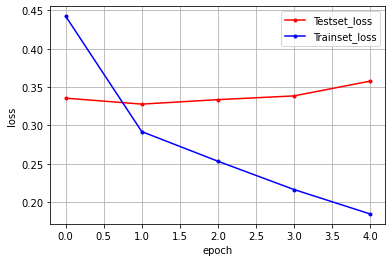

In [13]:
import matplotlib.pyplot as  plt

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()